# Analysis of Car Price Factors

The aim of the project is to analyze a dataset related to cars to gain insights into factors influencing their selling prices. This involves exploring relationships between various features such as engine size, horsepower, and fuel type with the selling prices. Additionally, the project aims to identify significant differences in prices based on categorical variables like manufacturer, body style, and drive wheels. Ultimately, the project aims to provide actionable insights for stakeholders in the automotive industry.

### Data Cleaning and Preparation:
- Imported necessary libraries and read the dataset.- 
Assigned column names and checked for missing values
- Replaced '?' with NaN values and dropped rows with missing values.
- Converted data types, normalized values, and performed one-hot encoding for categorical variables.
.es.

In [1]:
# Imported necessary libraries and read the dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#Reading file

cars= pd.read_csv("C:/Users/HP/Desktop/car.csv")
cars

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
# Assigned column names and checked for missing values.
column_name = ["Risksymboling", " Insurance_claims", "Manufacturer",  
           "Fuel_type", "Aspiration","Num_of_doors", 
           "Body_style","Drive_wheels", "Engine_location", 
           "Wheel_base","Car_Length", "Car_Width","Car_Height", "Curb_weight", 
           "Engine_type","Num_of_cylinders", "Engine_size",  
           "Fuel_system","Bore","Stroke", "Compression_ratio", 
           "Horsepower", "Peak_rpm","City_mpg","Highway_mpg","Price"] 

# Assigning name to columns
cars.columns= column_name
cars

,Risksymboling,Insurance_claims,Manufacturer,Fuel_type,Aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
#checking number of row and columns
cars.shape

(205, 26)

In [6]:
#check for missing values
cars.isna().any()

Risksymboling        False
 Insurance_claims    False
Manufacturer         False
Fuel_type            False
Aspiration           False
Num_of_doors         False
Body_style           False
Drive_wheels         False
Engine_location      False
Wheel_base           False
Car_Length           False
Car_Width            False
Car_Height           False
Curb_weight          False
Engine_type          False
Num_of_cylinders     False
Engine_size          False
Fuel_system          False
Bore                 False
Stroke               False
Compression_ratio    False
Horsepower           False
Peak_rpm             False
City_mpg             False
Highway_mpg          False
Price                False
dtype: bool

In [8]:
#Replaced '?' with NaN values and dropped rows with missing values.
cars.replace('?', np.nan, inplace=True)
cars

,Risksymboling,Insurance_claims,Manufacturer,Fuel_type,Aspiration,Num_of_doors,Body_style,Drive_wheels,Engine_location,Wheel_base,...,Engine_size,Fuel_system,Bore,Stroke,Compression_ratio,Horsepower,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [11]:
#retrieves the unique values of the "Price" column
cars.Price.unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', nan, '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [17]:
# Drop rows where the "price" column contains NaN and converting datatype to int
cars.dropna(subset=['Price'], inplace=True)
cars["Price"] = cars["Price"].astype(int)
cars.Price.unique()

array([13495, 16500, 13950, 17450, 15250, 17710, 18920, 23875, 16430,
       16925, 20970, 21105, 24565, 30760, 41315, 36880,  5151,  6295,
        6575,  5572,  6377,  7957,  6229,  6692,  7609,  8558,  8921,
       12964,  6479,  6855,  5399,  6529,  7129,  7295,  7895,  9095,
        8845, 10295, 12945, 10345,  6785, 11048, 32250, 35550, 36000,
        5195,  6095,  6795,  6695,  7395, 10945, 11845, 13645, 15645,
        8495, 10595, 10245, 10795, 11245, 18280, 18344, 25552, 28248,
       28176, 31600, 34184, 35056, 40960, 45400, 16503,  5389,  6189,
        6669,  7689,  9959,  8499, 12629, 14869, 14489,  6989,  8189,
        9279,  5499,  7099,  6649,  6849,  7349,  7299,  7799,  7499,
        7999,  8249,  8949,  9549, 13499, 14399, 17199, 19699, 18399,
       11900, 13200, 12440, 13860, 15580, 16900, 16695, 17075, 16630,
       17950, 18150, 12764, 22018, 32528, 34028, 37028,  9295,  9895,
       11850, 12170, 15040, 15510, 18620,  5118,  7053,  7603,  7126,
        7775,  9960,

In [18]:
cars.isna().any()


Risksymboling        False
 Insurance_claims     True
Manufacturer         False
Fuel_type            False
Aspiration           False
Num_of_doors          True
Body_style           False
Drive_wheels         False
Engine_location      False
Wheel_base           False
Car_Length           False
Car_Width            False
Car_Height           False
Curb_weight          False
Engine_type          False
Num_of_cylinders     False
Engine_size          False
Fuel_system          False
Bore                  True
Stroke                True
Compression_ratio    False
Horsepower            True
Peak_rpm              True
City_mpg             False
Highway_mpg          False
Price                False
dtype: bool

In [23]:
cars["Horsepower"] = pd.to_numeric(cars["Horsepower"], errors='coerce')
cars["Horsepower"].fillna(cars["Horsepower"].mean(), inplace=True)
cars.Horsepower.unique()

array([111.        , 154.        , 102.        , 115.        ,
       110.        , 140.        , 101.        , 121.        ,
       182.        ,  48.        ,  70.        ,  68.        ,
        88.        , 145.        ,  58.        ,  76.        ,
        60.        ,  86.        , 100.        ,  78.        ,
        90.        , 176.        , 262.        , 135.        ,
        84.        ,  64.        , 120.        ,  72.        ,
       123.        , 155.        , 184.        , 175.        ,
       116.        ,  69.        ,  55.        ,  97.        ,
       152.        , 160.        , 200.        ,  95.        ,
       142.        , 143.        , 207.        , 103.39698492,
        73.        ,  82.        ,  94.        ,  62.        ,
        56.        , 112.        ,  92.        , 161.        ,
       156.        ,  52.        ,  85.        , 114.        ,
       162.        , 134.        , 106.        ])

In [24]:
cars.dtypes

Risksymboling          int64
 Insurance_claims     object
Manufacturer          object
Fuel_type             object
Aspiration            object
Num_of_doors          object
Body_style            object
Drive_wheels          object
Engine_location       object
Wheel_base           float64
Car_Length           float64
Car_Width            float64
Car_Height           float64
Curb_weight            int64
Engine_type           object
Num_of_cylinders      object
Engine_size            int64
Fuel_system           object
Bore                  object
Stroke                object
Compression_ratio    float64
Horsepower           float64
Peak_rpm              object
City_mpg               int64
Highway_mpg            int64
Price                  int32
dtype: object

In [25]:
cars.isna().any()

Risksymboling        False
 Insurance_claims     True
Manufacturer         False
Fuel_type            False
Aspiration           False
Num_of_doors          True
Body_style           False
Drive_wheels         False
Engine_location      False
Wheel_base           False
Car_Length           False
Car_Width            False
Car_Height           False
Curb_weight          False
Engine_type          False
Num_of_cylinders     False
Engine_size          False
Fuel_system          False
Bore                  True
Stroke                True
Compression_ratio    False
Horsepower           False
Peak_rpm              True
City_mpg             False
Highway_mpg          False
Price                False
dtype: bool

In [27]:
#Converting mpg to L/100km and checking the data type of each column.
cars['City_mpg'] = 235 / cars['City_mpg'] 
cars.rename(columns = {'City_mpg': "city-L / 100km"}, inplace = True) 
  
print(cars.columns) 
  
# checking the data type of each column 
cars.dtypes  


Index(['Risksymboling', ' Insurance_claims', 'Manufacturer', 'Fuel_type',
       'Aspiration', 'Num_of_doors', 'Body_style', 'Drive_wheels',
       'Engine_location', 'Wheel_base', 'Car_Length', 'Car_Width',
       'Car_Height', 'Curb_weight', 'Engine_type', 'Num_of_cylinders',
       'Engine_size', 'Fuel_system', 'Bore', 'Stroke', 'Compression_ratio',
       'Horsepower', 'Peak_rpm', 'city-L / 100km', 'Highway_mpg', 'Price'],
      dtype='object')


Risksymboling          int64
 Insurance_claims     object
Manufacturer          object
Fuel_type             object
Aspiration            object
Num_of_doors          object
Body_style            object
Drive_wheels          object
Engine_location       object
Wheel_base           float64
Car_Length           float64
Car_Width            float64
Car_Height           float64
Curb_weight            int64
Engine_type           object
Num_of_cylinders      object
Engine_size            int64
Fuel_system           object
Bore                  object
Stroke                object
Compression_ratio    float64
Horsepower           float64
Peak_rpm              object
city-L / 100km       float64
Highway_mpg            int64
Price                  int32
dtype: object

In [28]:
# .  Normalizing values
cars['Car_Length'] = cars['Car_Length']/cars['Car_Length'].max() 
cars['Car_Width'] = cars['Car_Width']/cars['Car_Width'].max() 
cars['Car_Height'] = cars['Car_Height']/cars['Car_Height'].max() 


### Exploratory Data Analysis (EDA)/Descriptive Analysis: 
Data exploration, and visualization steps to understand the basic properties of the dataset, such as distributions, relationships between variables, and summary statistics.

- Visualized the distribution of selling prices using a histogram.- 
Explored the variation in selling prices by manufacturer using box plots
- Investigated the relationships between selected features (engine size, horsepower) and prices using scatter plots.
- Calculated and visualized correlation coefficients between selected numerical features.
- Explored the impact of fuel type on selling prices through bar plots.
- Analyzed selling prices based on body style and drive wheels using box plots.lots.

In [29]:
cars.describe()

,Risksymboling,Wheel_base,Car_Length,Car_Width,Car_Height,Curb_weight,Engine_size,Compression_ratio,Horsepower,city-L / 100km,Highway_mpg,Price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,10.164279,103.396985,9.944145,30.686567,13207.129353
std,1.254802,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,4.004965,37.365602,2.534599,6.815150,7947.066342
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,48.000000,4.795918,16.000000,5118.000000
25%,0.000000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,8.600000,70.000000,7.833333,25.000000,7775.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,9.000000,95.000000,9.791667,30.000000,10295.000000
75%,2.000000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,9.400000,116.000000,12.368421,34.000000,16500.000000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,262.000000,18.076923,54.000000,45400.000000


In [32]:
# categorical to numerical variables applying one-hot encoding using pd.get_dummies() on the "fuel-type" column.
pd.get_dummies(cars['Fuel_type']).head() 

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


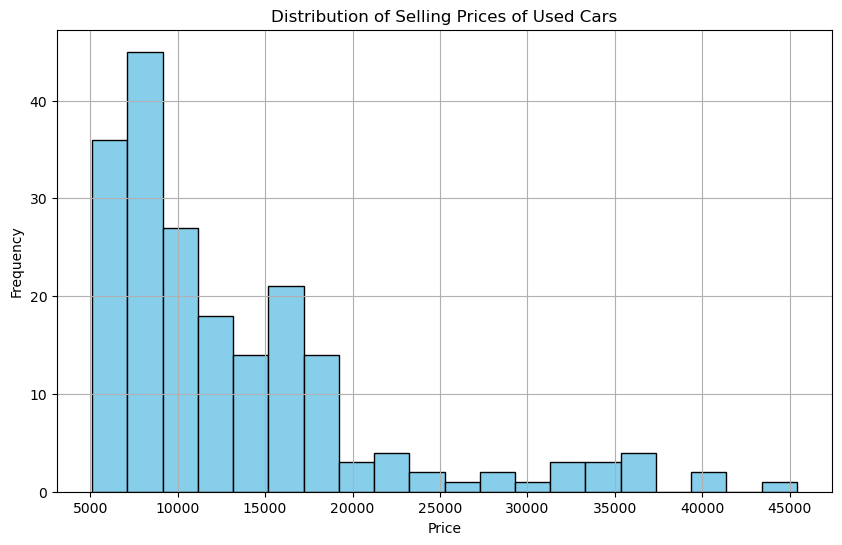

In [33]:
# Plot the distribution of selling prices using a histogram
plt.figure(figsize=(10, 6))
plt.hist(cars['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Selling Prices of Used Cars')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [45]:
print("Unique Manufacturer\n",cars["Manufacturer"].unique())
print("Total count Manufacturer\n",cars["Manufacturer"].unique().size) 

Unique Manufacturer
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Total count Manufacturer
 22


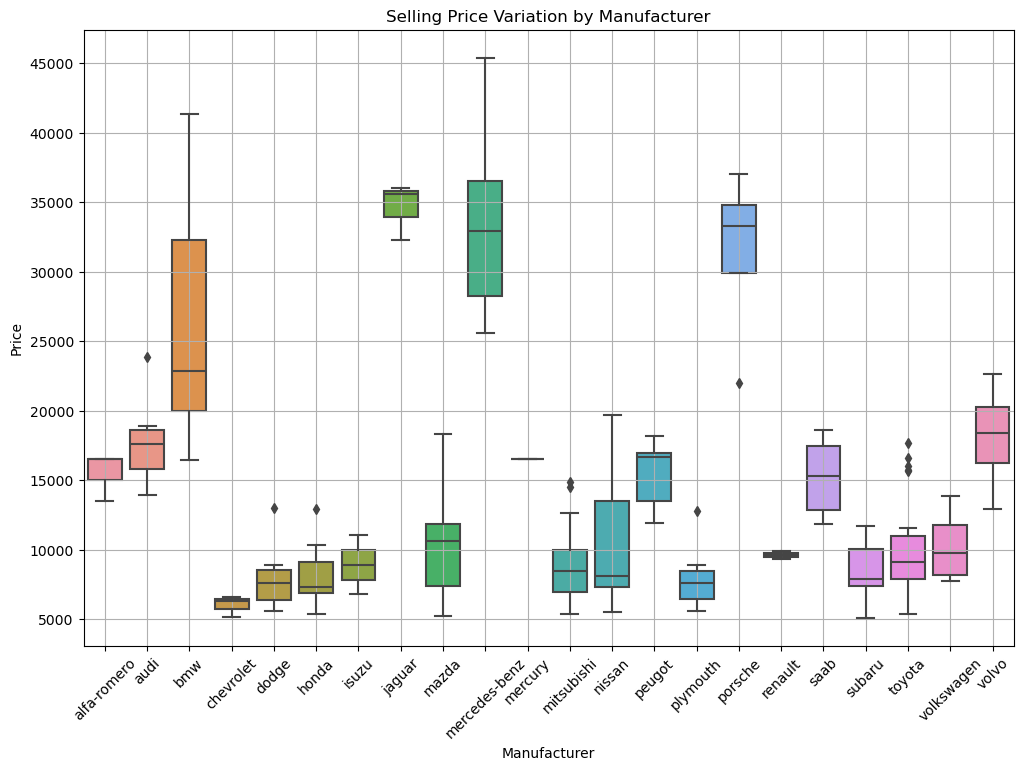

In [34]:
# Create a box plot to visualize the distribution of selling prices for each manufacturer
plt.figure(figsize=(12, 8))
sns.boxplot(x='Manufacturer', y='Price', data=cars)
plt.title('Selling Price Variation by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

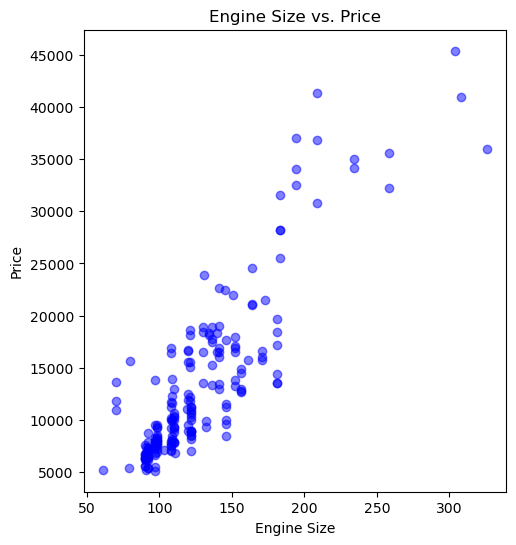

In [48]:
# Select the relevant columns for analysis

selected_columns = ['Engine_size', 'Horsepower', 'Price']
selected_data = cars[selected_columns]

# Check for missing values and drop rows with missing data
selected_data = selected_data.dropna()

# Visualize the relationships using scatter plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(selected_data['Engine_size'], selected_data['Price'], color='blue', alpha=0.5)
plt.title('Engine Size vs. Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

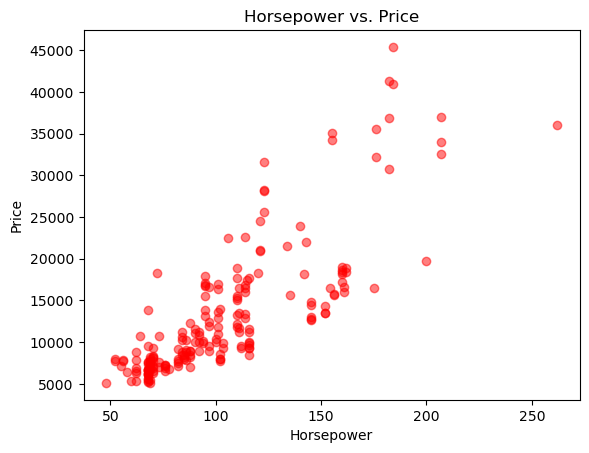

In [47]:
plt.scatter(selected_data['Horsepower'], selected_data['Price'], color='red', alpha=0.5)
plt.title('Horsepower vs. Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

Correlation Matrix:
             Engine_size  Horsepower     Price
Engine_size     1.000000    0.822649  0.872335
Horsepower      0.822649    1.000000  0.809681
Price           0.872335    0.809681  1.000000


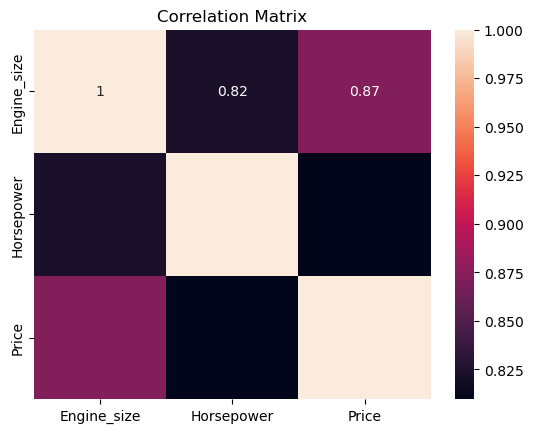

In [53]:
# Calculate the correlation coefficients
correlation_matrix = selected_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Unique Fuel Types: ['gas' 'diesel']
  Fuel_type        Price
0    diesel  15838.15000
1       gas  12916.40884


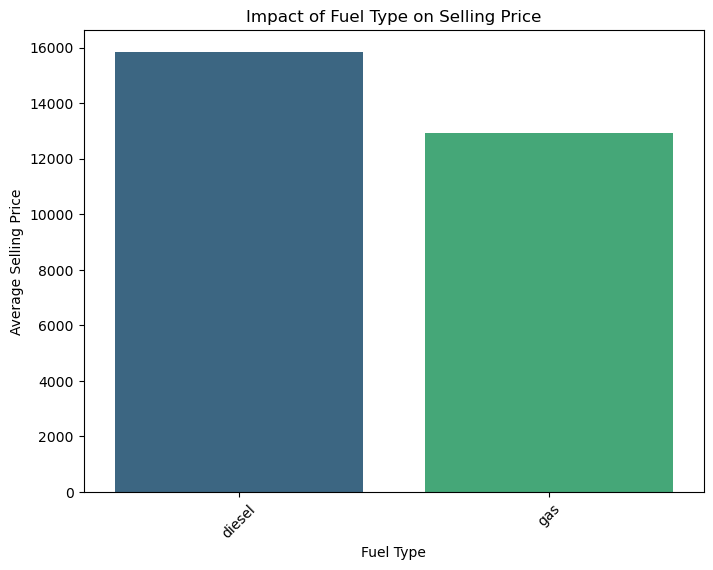

In [59]:
# Check unique values in the 'Fuel_type' column
print("Unique Fuel Types:", cars['Fuel_type'].unique())

# Group the data by 'Fuel_type' and calculate the average selling price
fuel_type_prices = cars.groupby('Fuel_type')['Price'].mean().reset_index()

print(fuel_type_prices)

# Visualize the impact of fuel type on selling price
plt.figure(figsize=(8, 6))
sns.barplot(x='Fuel_type', y='Price', data=fuel_type_prices, palette='viridis')
plt.title('Impact of Fuel Type on Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()

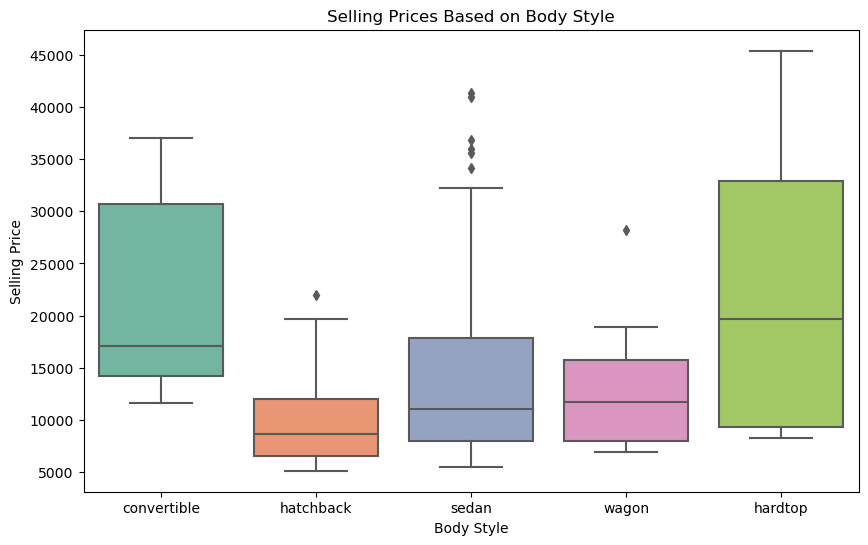

In [62]:
# Create box plots for body style
plt.figure(figsize=(10, 6))
sns.boxplot(x='Body_style', y='Price', data=cars, palette='Set2')
plt.title('Selling Prices Based on Body Style')
plt.xlabel('Body Style')
plt.ylabel('Selling Price')
plt.show()



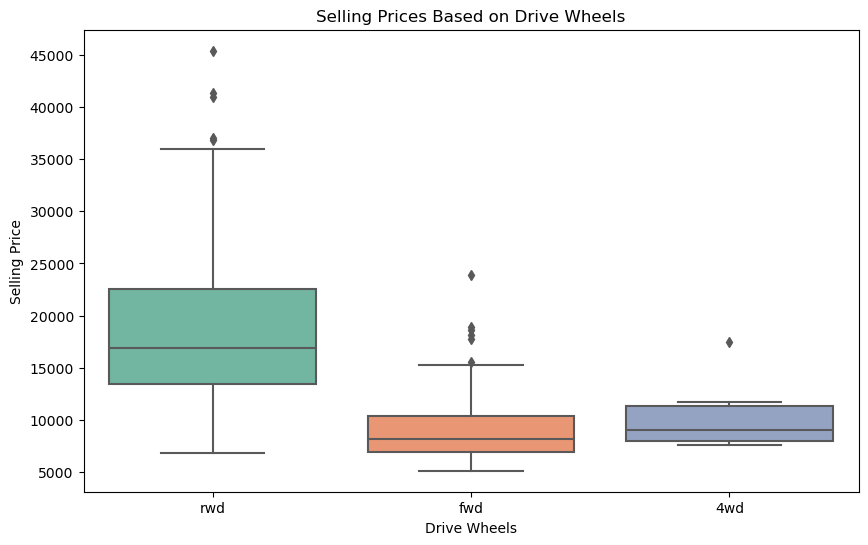

In [63]:
# Create box plots for drive wheels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drive_wheels', y='Price', data=cars, palette='Set2')
plt.title('Selling Prices Based on Drive Wheels')
plt.xlabel('Drive Wheels')
plt.ylabel('Selling Price')
plt.show()


In [65]:
# Grouping the data according to wheel, body-style and price.

# Grouping Data 
test = cars[['Drive_wheels', 'Body_style', 'Price']] 
data_grp = test.groupby(['Drive_wheels', 'Body_style'],  
                         as_index = False).mean() 
  
data_grp 

,Drive_wheels,Body_style,Price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


                   Price                                            \
Body_style   convertible       hardtop     hatchback         sedan   
Drive_wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
Body_style           wagon  
Drive_wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222  


C:\Users\HP\AppData\Local\Temp\ipykernel_10152\1209688479.py:10: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


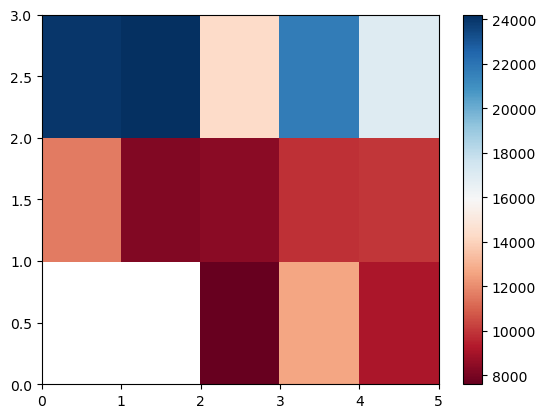

In [69]:
# Using the pivot method and plotting the heatmap according to the data obtained by pivot method

# pivot method 
data_pivot = data_grp.pivot(index = 'Drive_wheels', 
                            columns = 'Body_style') 
print(data_pivot )
  
# heatmap for visualizing data 
plt.pcolor(data_pivot, cmap ='RdBu') 
plt.colorbar() 
plt.show() 

### Regression Analysis/Predictive Analysis:
Linear regression was utilized to predict the selling prices of cars based on features like engine size and horsepower.
- Plotted regression lines along with scatter plots for visual representation.
- Performed linear regression to analyze the relationship between engine size/horsepower and prices.n.

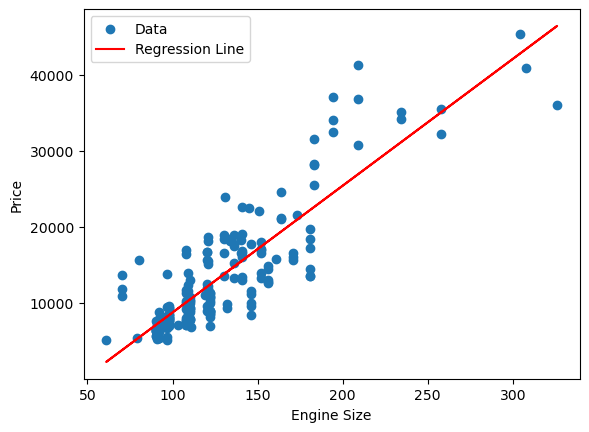

0.8723351674455198


In [71]:
from scipy import stats
import matplotlib.pyplot as plt

# Perform linear regression
slope, intercept, r, p, std_err = stats.linregress(cars["Engine_size"], cars["Price"])

# Define the regression function
def myfunc(x):
    return slope * x + intercept

# Calculate the predicted values using the regression function
mymodel = myfunc(cars["Engine_size"])

# Plot the scatter plot
plt.scatter(cars["Engine_size"], cars["Price"], label="Data")

# Plot the regression line
plt.plot(cars["Engine_size"], mymodel, color="red", label="Regression Line")

# Add labels and legend
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.legend()

# Show the plot
plt.show()

print(r)

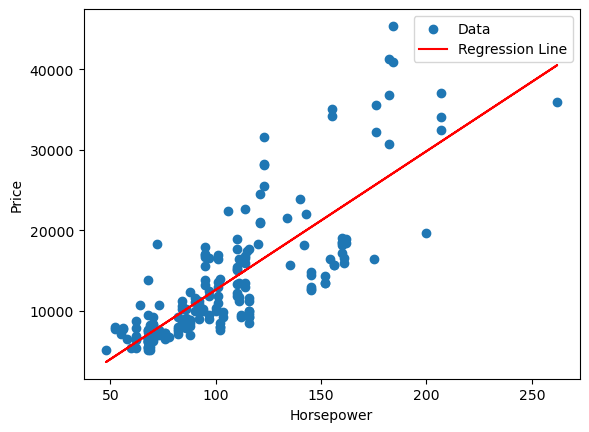

0.8096811975632281


In [72]:
from scipy import stats
import matplotlib.pyplot as plt

# Perform linear regression
slope, intercept, r, p, std_err = stats.linregress(cars["Horsepower"], cars["Price"])

# Define the regression function
def myfunc(x):
    return slope * x + intercept

# Calculate the predicted values using the regression function
mymodel = myfunc(cars["Horsepower"])

# Plot the scatter plot
plt.scatter(cars["Horsepower"], cars["Price"], label="Data")

# Plot the regression line
plt.plot(cars["Horsepower"], mymodel, color="red", label="Regression Line")

# Add labels and legend
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.legend()

# Show the plot
plt.show()

print(r)

### Analysis of Variance (ANOVA)/Inferential Analysis: :
ANOVA tests were performed to make inferences about the population means of prices across different categories. This helps in understanding whether there are significant differences in prices based on certain categorical variables.
- Conducted ANOVA tests to compare the means of prices across different categories like manufacturers, body styles, and drive wheels..

In [77]:
# Analysis of Variance- ANOVA 
# returns f-test and p-value 
# f-test = variance between sample group means divided by  
# variation within sample group 
# p-value = confidence degree 
import scipy as sp 
data_annova = cars[['Manufacturer', 'Price']] 
grouped_annova = data_annova.groupby(['Manufacturer']) 
annova_results_l = sp.stats.f_oneway( 
                             grouped_annova.get_group('honda')['Price'], 
                             grouped_annova.get_group('subaru')['Price'] 
                                    ) 
print(annova_results_l) 

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


In [78]:
import scipy.stats as stats

# Perform ANOVA for body style
anova_body_style = stats.f_oneway(
    cars[cars['Body_style'] == 'sedan']['Price'],
    cars[cars['Body_style'] == 'hatchback']['Price'],
    cars[cars['Body_style'] == 'wagon']['Price']
)

# Perform ANOVA for drive wheels
anova_drive_wheels = stats.f_oneway(
    cars[cars['Drive_wheels'] == 'fwd']['Price'],
    cars[cars['Drive_wheels'] == 'rwd']['Price'],
    cars[cars['Drive_wheels'] == '4wd']['Price']
)

print("ANOVA Results for Body Style:", anova_body_style)
print("ANOVA Results for Drive Wheels:", anova_drive_wheels)

ANOVA Results for Body Style: F_onewayResult(statistic=8.626853682554598, pvalue=0.00026230217494082415)
ANOVA Results for Drive Wheels: F_onewayResult(statistic=67.95406500780399, pvalue=3.3945443577151245e-23)
